In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
from qasvm.datasets import Toy2DLinearLoader, Sklearn_DataLoader, Toy2DXORLoader, ToyBlochSphereLoader
from qasvm.preprocessing import DataMultiScaler, DataScaler
from qasvm.classifier import BinarySVM
from qasvm.kernel import Kernel
from sklearn.datasets import make_circles, make_moons, load_breast_cancer
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
w = (1,1)
b = 1
kernel = Kernel('linear')
k = 100
C = 0.1


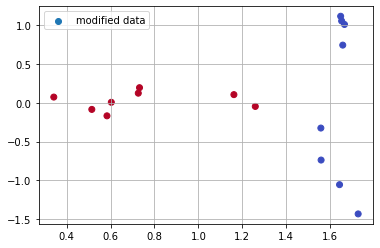

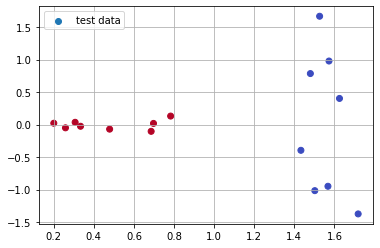

In [4]:
np.random.seed(50)
X, y = make_circles(100, noise=0.01)
Xt, yt = make_circles(100, noise=0.01)
dl = Toy2DLinearLoader(w, b)
dl = Toy2DXORLoader(-1/6, 1/2, 7/6)
dl = ToyBlochSphereLoader(gap=np.pi/8)
X, y = dl(16, 0.1)
Xt, yt = dl(16, 0.1)
ds = []
#ds.append(DataScaler('maxabs'))
#ds.append(DataScaler('standard', with_std=False))
#ds.append(DataScaler('normalize'))
#mds = DataMultiScaler(*ds)
#plt.scatter(X[:,0], X[:,1], marker='o', c=y, cmap=plt.cm.coolwarm, label='original data')
#X = mds(X)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, cmap=plt.cm.coolwarm, label='modified data')
plt.grid()
plt.legend()
plt.figure()
plt.scatter(Xt[:,0], Xt[:,1], marker='o', c=yt, cmap=plt.cm.coolwarm, label='test data')
plt.grid()
plt.legend()

In [5]:
svm11 = BinarySVM(Kernel('SingleQubit'), C=1e10, mutation='REDUCED_uniform_QASVM', k=0.1)
svm12 = BinarySVM(Kernel('SingleQubit'), C=1e2, mutation='REDUCED_uniform_QASVM', k=0.1)
svm21 = BinarySVM(Kernel('SingleQubit'), C=1e0, mutation='REDUCED_uniform_QASVM', k=0.1)
svm22 = BinarySVM(Kernel('SingleQubit'), C=1e-10, mutation='REDUCED_uniform_QASVM', k=0.1)

svms = [[svm11, svm12], [svm21, svm22]]
for i in range(2):
    for j in range(2):
        svms[i][j].fit(X, y)


0.625 uniform
0.625 uniform
0.625 uniform
0.625 uniform


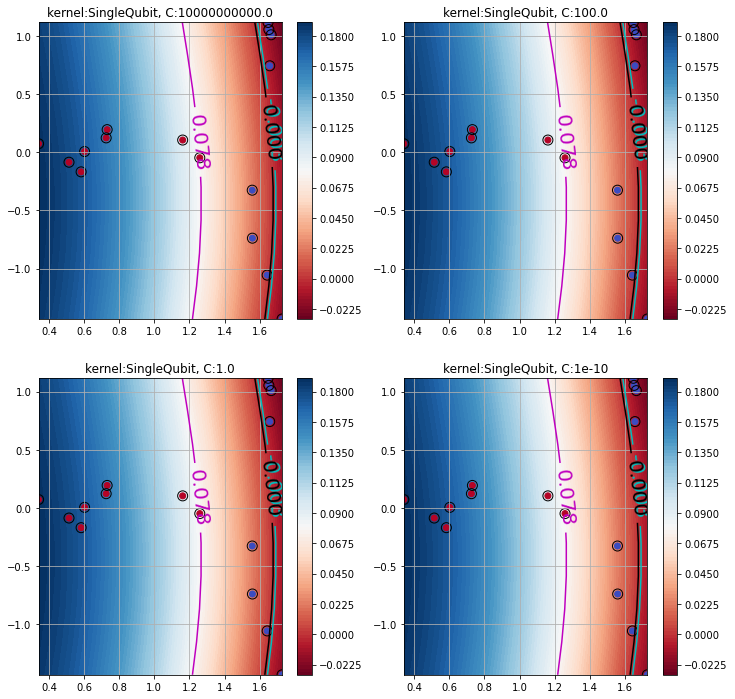

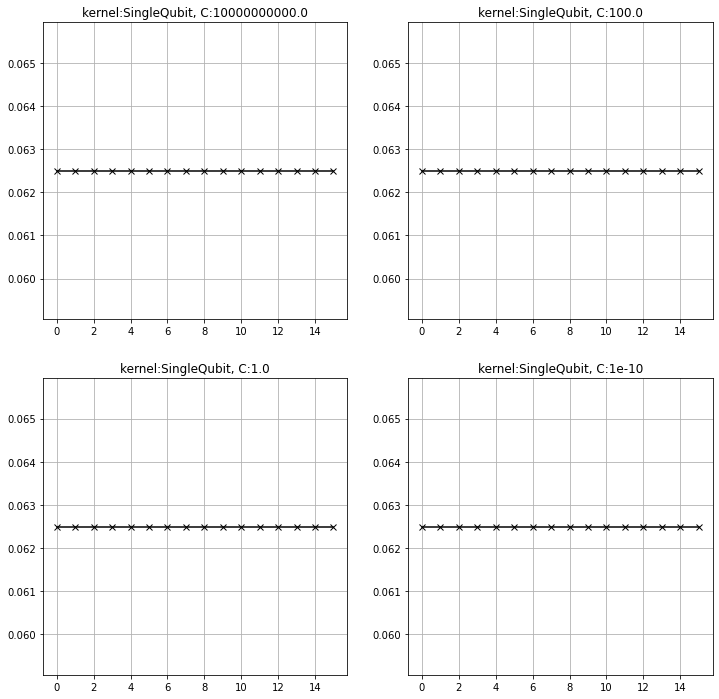

In [6]:
fig1, axes1 = plt.subplots(2, 2, figsize=(12, 12))
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    for j in range(2):
        svms[i][j].plot_boundary(ax=axes1[i][j], fig=fig1)
        axes1[i][j].set_title('kernel:{:}, C:{:}'.format(svms[i][j].kernel, svms[i][j].C))
        svms[i][j].plot('alpha', ax=axes2[i][j])
        axes2[i][j].set_title('kernel:{:}, C:{:}'.format(svms[i][j].kernel, svms[i][j].C))
        print(svms[i][j].accuracy(Xt, yt), svms[i][j].status)


In [8]:
from qasvm.circuits.classifier import BinaryQASVM, OneLocal
from qiskit.aqua.components.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal, EfficientSU2
from qiskit.providers.aer import QasmSimulator
from qiskit.aqua import QuantumInstance

qi = QuantumInstance(QasmSimulator(shots=1024))
opt = SLSQP()
feature_map = OneLocal()
var_form = EfficientSU2(4)
dataset = {'data':X, 'label':y}
qasvm = BinaryQASVM(opt, feature_map, var_form, dataset, None, qi)




In [11]:
from qiskit import transpile
transpile(qasvm.dual_qc, basis_gates=['cx', 'rx', 'ry', 'rz'], optimization_level=3).depth()

9663

In [10]:
qasvm.evaluate_circuit()

AttributeError: 'BinaryQASVM' object has no attribute 'primal_qc'